In [1]:
import os
import numpy as np
#import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time
from tensorflow.keras.optimizers import Adamax
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
# from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from math import log
from PIL import Image
import seaborn as sns
# import tensorflow as hub
from tensorflow.keras import mixed_precision

2025-03-16 13:32:21.131411: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 13:32:21.428988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-16 13:32:21.544539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-16 13:32:21.580615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 13:32:21.820605: I tensorflow/core/platform/cpu_feature_guar

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Only use the first GPU
    tf.config.experimental.set_memory_growth(gpus[0], True)
    # tf.config.set_visible_devices(gpus[0], 'GPU')
    
# if gpus:
#     try:
        
#     except RuntimeError as e:
#         print(e)


I0000 00:00:1742124755.779817   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124756.099997   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124756.100297   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
tf.config.list_physical_devices('GPU')
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
mixed_precision.set_global_policy('mixed_float16')

In [4]:
import keras.backend as K
dtype='float16'
K.set_floatx(dtype)
K.set_epsilon(1e-4) 

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 798353568388089111
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5833228288
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6808176059310758709
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1742124762.890024   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124762.890156   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124762.890205   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124763.090635   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124763.090772   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-16

In [5]:
root='~/repos/itfest2025'
print()
img_path="archive/Training"
datagen=ImageDataGenerator(rescale=1./255)
traingenerator=datagen.flow_from_directory(directory=img_path,target_size=(128,128),batch_size=5800,class_mode='categorical')
imgs,labels=next(traingenerator)


Found 5712 images belonging to 4 classes.


In [ ]:
# print(len(imgs))

100


In [6]:
img_path="archive/Testing"
datatester=datagen.flow_from_directory(directory=img_path,target_size=(128,128),batch_size=5000,class_mode='categorical')

Found 1311 images belonging to 4 classes.


In [7]:
imgstesting,labelstesting=next(datatester)

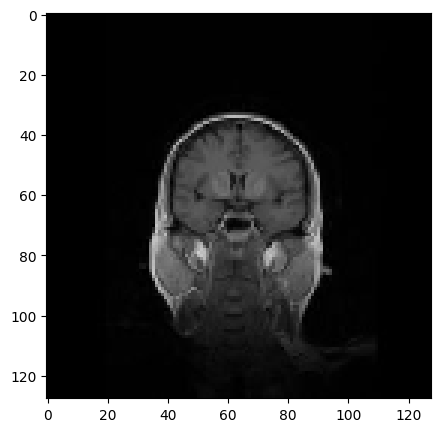

In [7]:
img_to_show=imgstesting[10]
label=labelstesting[10]
plt.figure(figsize=(10,5))
plt.imshow(img_to_show)
plt.show()

In [8]:
classes=traingenerator.class_indices.keys()
num_classes=len(classes)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(imgs,labels,test_size=0.1,random_state=42)

In [ ]:
model0=Sequential()
model0.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation="relu",
    padding="Same",
    input_shape=(128,128,3)
))
model0.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    padding="Same",
    activation="relu"
))
model0.add(MaxPool2D(
    pool_size=(2,2)
))
model0.add(Conv2D(
    filters=16,
    kernel_size=(3,3),
    activation="relu"
))
model0.add(MaxPool2D(
    pool_size=(2,2)
))
model0.add(Dropout(0.25))
model0.add(Flatten())
model0.add(Dense(
    128,
    activation="relu"
))
model0.add(Dropout(0.5))
model0.add(Dense(
    64,
    activation="relu"
))
model0.add(Dense(
    num_classes,
    activation="softmax"
))

/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741978696.031397   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.031856   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.031909   90878 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1741978696.032796   90878 c

In [ ]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,968,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,991,540 (7.60 MB)

 Trainable params: 1,991,540 (7.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer=RMSprop(learning_rate=0.001,rho=0.9,epsilon=1e-08)
model0.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

In [ ]:
datagen.fit(x_train)

In [ ]:
history=model0.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=15,
    verbose=1,
    # class_weight=class_weights
)

Epoch 1/15


I0000 00:00:1741978711.679395   91316 service.cc:146] XLA service 0x7cd2f8009d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741978711.679955   91316 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-14 20:58:31.810454: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-14 20:58:32.109894: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  9/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2177 - loss: 1.8411

I0000 00:00:1741978716.739640   91316 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms/step - accuracy: 0.5307 - loss: 1.0947 - val_accuracy: 0.8217 - val_loss: 0.5174
Epoch 2/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7838 - loss: 0.5460 - val_accuracy: 0.8531 - val_loss: 0.3843
Epoch 3/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8483 - loss: 0.3943 - val_accuracy: 0.8409 - val_loss: 0.4067
Epoch 4/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8885 - loss: 0.3211 - val_accuracy: 0.9143 - val_loss: 0.2662
Epoch 5/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9181 - loss: 0.2417 - val_accuracy: 0.9283 - val_loss: 0.2286
Epoch 6/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9379 - loss: 0.1874 - val_accuracy: 0.9458 - val_loss: 0.1846
Epoch 7/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9459 - loss: 0.1506 - val_accuracy: 0.9336 - val_loss: 0.2149
Epoch 8/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9525 - loss: 0.1468 - val_accuracy: 0.937

In [ ]:
preds=model0.predict(imgstesting)
pred_class=np.argmax(preds,axis=1)
y_true=np.argmax(labelstesting,axis=1)
mat=confusion_matrix(y_true,pred_class)
mat2=np.zeros((num_classes,num_classes),)
for i in range(num_classes):
    sm=sum(mat[i])
    for j in range(num_classes):
        x=mat[i][j]/sm
        mat2[i][j]=x

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
mat2_arr=np.array(mat2)
labels=classes

In [ ]:
conf_mat_test=pd.DataFrame(data=mat2_arr,columns=labels,index=labels)

<Axes: >

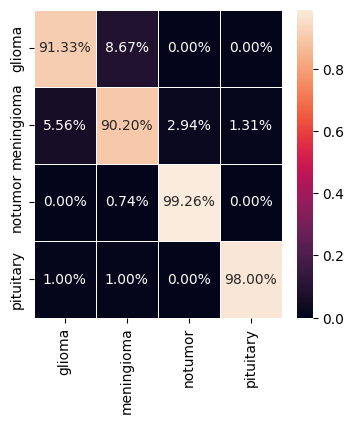

In [ ]:
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")

In [ ]:
model0.save('brain_tumor_version1.keras')

In [10]:
# img_shape=(128,128,3)
# tf.keras.layers,
model1=Sequential()
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model1.add(MaxPool2D((2,2)))
# model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model1.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(num_classes,activation='softmax'))

/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1742124791.414209   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124791.414524   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124791.414575   83370 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742124791.415324   83370 c

In [11]:
model1.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,077,764 (61.33 MB)

 Trainable params: 16,077,764 (61.33 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
datagen=ImageDataGenerator(
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    vertical_flip=False
)

In [13]:
datagen.fit(x_train)

In [14]:
history=model1.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=15,
    verbose=1,
    # class_weight=class_weights
)

Epoch 1/15


I0000 00:00:1742124810.486629   83837 service.cc:146] XLA service 0x7121b4003f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742124810.486712   83837 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-16 13:33:30.641042: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-16 13:33:30.991297: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-16 13:33:31.864971: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1400', 8 bytes spill stores, 8 bytes spill loads

2025-03-16 13:33:31.971086: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory 

160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3673 - loss: 1.2603

2025-03-16 13:34:01.239494: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1400', 8 bytes spill stores, 8 bytes spill loads

2025-03-16 13:34:01.642167: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1400', 32 bytes spill stores, 32 bytes spill loads



161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.3681 - loss: 1.2591

2025-03-16 13:34:10.820674: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


161/161 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.3688 - loss: 1.2580 - val_accuracy: 0.7343 - val_loss: 0.6828
Epoch 2/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.7351 - loss: 0.6081 - val_accuracy: 0.8252 - val_loss: 0.4477
Epoch 3/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.8210 - loss: 0.4563 - val_accuracy: 0.8497 - val_loss: 0.3837
Epoch 4/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.8641 - loss: 0.3346 - val_accuracy: 0.8531 - val_loss: 0.4046
Epoch 5/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.8849 - loss: 0.3157 - val_accuracy: 0.8811 - val_loss: 0.3378
Epoch 6/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.9034 - loss: 0.2519 - val_accuracy: 0.8671 - val_loss: 0.3311
Epoch 7/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9197 - loss: 0.2106 - val_accuracy: 0.9021 - val_loss: 0.2466
Epoch 8/15
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9255 - loss: 0.1896 - val

In [ ]:
model1.save('brain_tumor_version2.keras')

: 

In [15]:
preds=model1.predict(imgstesting)
pred_class=np.argmax(preds,axis=1)
y_true=np.argmax(labelstesting,axis=1)
mat=confusion_matrix(y_true,pred_class)
mat2=np.zeros((num_classes,num_classes),)
for i in range(num_classes):
    sm=sum(mat[i])
    for j in range(num_classes):
        x=mat[i][j]/sm
        mat2[i][j]=x

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step


In [16]:
mat2_arr=np.array(mat2)
labels=classes

In [17]:
conf_mat_test=pd.DataFrame(data=mat2_arr,columns=labels,index=labels)

<Axes: >

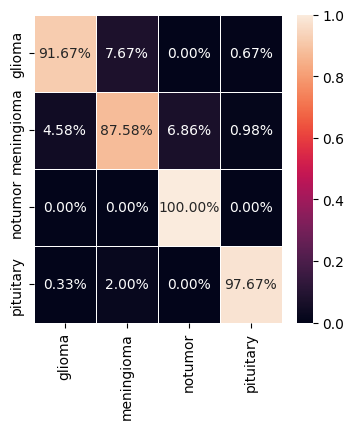

In [18]:
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")

<Axes: >

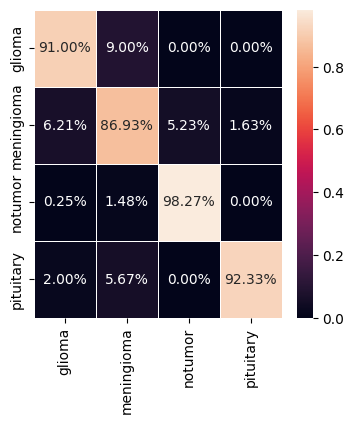

In [19]:
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")

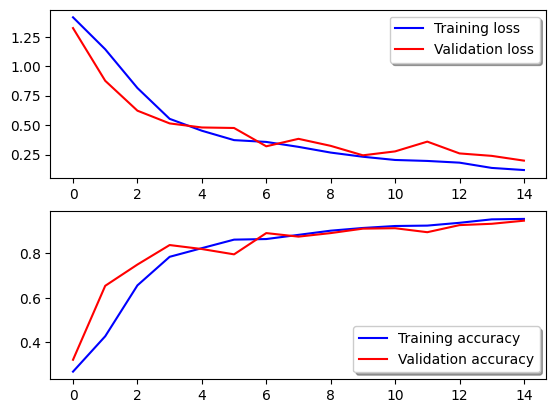

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
#using efficientdet for tumor detection
os.getcwd()
model_directory='efficientdet_d0_coco17_tpu-32/efficientdet_d0_coco17_tpu-32/saved_model'

In [ ]:
try:
    efficientdet=tf.saved_model.load(model_directory)
    print(f"Model loaded successfully from: {model_directory}")
except Exception as e:
    print(e)
    

I0000 00:00:1742032894.488704    1424 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742032894.770229    1424 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742032894.770389    1424 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742032894.777587    1424 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742032894.777815    1424 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model loaded successfully from: efficientdet_d0_coco17_tpu-32/efficientdet_d0_coco17_tpu-32/saved_model


In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import Xception

In [ ]:
root='~/repos/itfest2025'
print()
img_path="archive/Training"
datagen=ImageDataGenerator(rescale=1./255)
traingenerator=datagen.flow_from_directory(directory=img_path,target_size=(64,64),batch_size=1000,class_mode='categorical')
imgs,labels=next(traingenerator)


Found 5712 images belonging to 4 classes.


In [12]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

In [21]:
efficientnet=EfficientNetB0(weights=None,include_top=False,input_shape=(64,64,3))

In [13]:
xception=Xception(weights='imagenet',include_top=False,input_shape=(128,128,3))

I0000 00:00:1742048547.400421   68720 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742048547.400544   68720 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742048547.400589   68720 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1742048547.401025   68720 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-15 16:22:27.401051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2112] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.

In [14]:
# efficientnetmodel0=tf.keras.Sequential([
#     ,
#     GlobalAveragePooling2D(),
#     Dense(128,activation='relu'),
#     Dense(num_classes,dtype='float16',activation='softmax')
# ])
exceptionmodel0=tf.keras.Sequential([
    xception,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128,activation='relu'),
    Dropout(rate=0.25),
    Dense(num_classes,activation='softmax')
])

In [15]:
exceptionmodel0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 4, 4, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,056,428 (95.58 MB)

 Trainable params: 25,001,900 (95.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [22]:
efficientnet.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 64, 64, 3) │          0 │ input_layer_1[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 64, 64, 3) │          7 │ rescaling[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 65, 65, 3) │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 32, 32,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 32, 32,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 32, 32,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 32, 32,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 32, 32,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 32, 32,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 32, 32,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 32, 32,    │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 32, 32,    │         64 │ block1a_project_

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [16]:
exceptionmodel0.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


2025-03-15 16:22:48.824459: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


In [17]:
historyEN0=exceptionmodel0.fit(traingenerator,
                                  epochs=10,
                                  validation_data=datatester)

/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1742048602.347860   69016 service.cc:146] XLA service 0x72050c02bd40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742048602.347967   69016 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-03-15 16:23:22.824564: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-15 16:23:26.056775: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-15 16:23:30.389588: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.81GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-03-15 16:23:32.412117: W external/local_tsl/tsl/framework/bfc_allocator

UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_68720/1477659095.py", line 1, in <module>

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv.144 = (f16[5000,61,61,64]{3,2,1,0}, u8[0]{0}) custom-call(f16[5000,63,63,32]{3,2,1,0} %maximum.40, f16[64,3,3,32]{3,2,1,0} %transpose.1056), window={size=3x3}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="sequential_1/xception_1/block1_conv2_1/convolution" source_file="/home/razvan/miniconda3/envs/tf2/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1177}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 2398217216 bytes.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_37435]

In [ ]:
preds=efficientnetmodel0.predict(imgstesting)
pred_class=np.argmax(preds,axis=1)
y_true=np.argmax(labelstesting,axis=1)
mat=confusion_matrix(y_true,pred_class)
mat2=np.zeros((num_classes,num_classes),)
for i in range(num_classes):
    sm=sum(mat[i])
    for j in range(num_classes):
        x=mat[i][j]/sm
        mat2[i][j]=x

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


<Axes: >

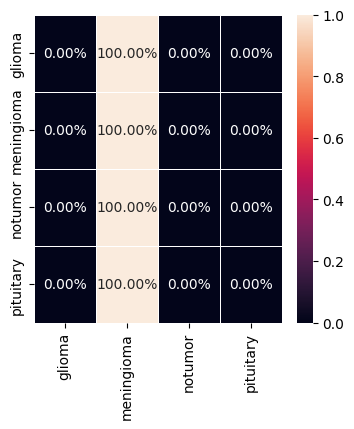

In [ ]:
mat2_arr=np.array(mat2)
labels=classes
conf_mat_test=pd.DataFrame(data=mat2_arr,columns=labels,index=labels)
fig,ax=plt.subplots(figsize=(num_classes,num_classes))
sns.heatmap(conf_mat_test,annot=True,linewidths=.5,ax=ax,fmt=".2%")